<a href="https://colab.research.google.com/github/veeransr/ML-and-Deep-learning-practice-with-python/blob/master/Support_vector_machines_and_data_treat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, you will use SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [0]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

Load the Cancer data
The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:
Field name	Description
ID	Clump thickness
Clump	Clump thickness
UnifSize	Uniformity of cell size
UnifShape	Uniformity of cell shape
MargAdh	Marginal adhesion
SingEpiSize	Single epithelial cell size
BareNuc	Bare nuclei
BlandChrom	Bland chromatin
NormNucl	Normal nucleoli
Mit	Mitoses
Class	Benign or malignant


For the purposes of this example, we're using a dataset that has a relatively small number of predictors in each record. To download the data, we will use !wget to download it from IBM Object Storage.

In [0]:
#Click here and press Shift+Enter
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-05-21 08:53:33--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  20.19K  --.-KB/s    in 0.01s   

2020-05-21 08:53:33 (1.60 MB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [0]:
df=pd.read_csv('cell_samples.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [0]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [0]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1846a24e0>,
      dtype=object)

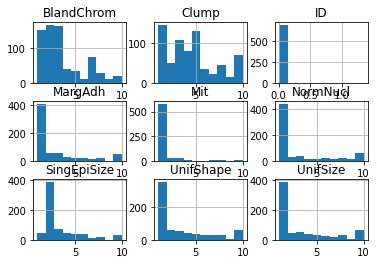

In [0]:
X.hist()

In [0]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

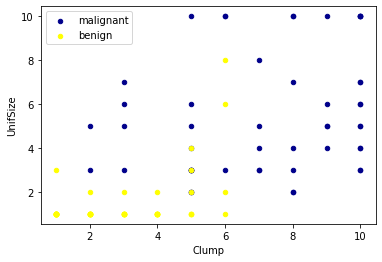

In [0]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

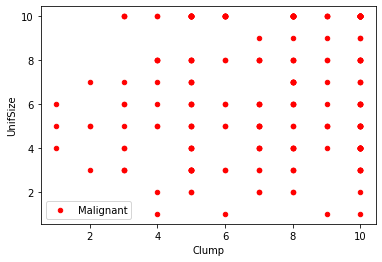

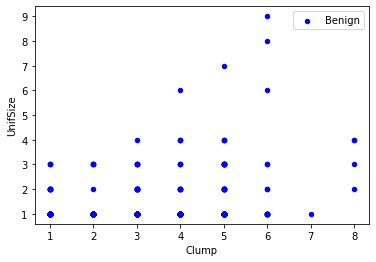

In [0]:
ax=df[df['Class']==4][0:699].plot(kind='scatter', x='Clump', y='UnifSize', color='Red', label='Malignant');
df[df['Class']==2][0:699].plot(kind='scatter', x='Clump', y='UnifSize', color='Blue', label='Benign');
plt.show()

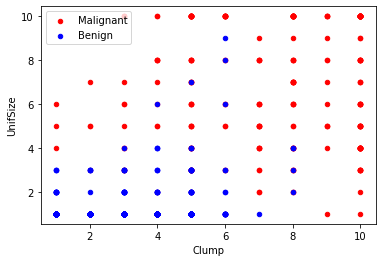

In [0]:
ax=df[df['Class']==4].plot(kind='scatter', x='Clump', y='UnifSize', color='Red', label='Malignant');
df[df['Class']==2].plot(kind='scatter', x='Clump', y='UnifSize', color='Blue', label='Benign', ax=ax);
plt.show()

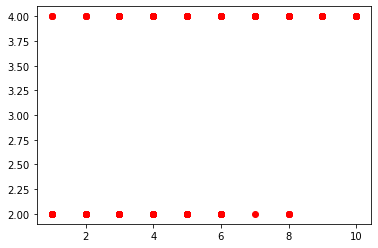

In [0]:
plt.scatter(X[:, 1], y, color='red')

In [0]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

It looks like the BareNuc column includes some values that are not numerical. We can drop those rows:

In [0]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [0]:
cdf=df[['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
        'BlandChrom', 'NormNucl', 'Mit',]]
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


In [0]:
X=np.asarray(cdf)
X

array([[1000025,       5,       1, ...,       3,       1,       1],
       [1002945,       5,       4, ...,       3,       2,       1],
       [1015425,       3,       1, ...,       3,       1,       1],
       ...,
       [ 888820,       5,      10, ...,       8,      10,       2],
       [ 897471,       4,       8, ...,      10,       6,       1],
       [ 897471,       4,       8, ...,      10,       4,       1]])

In [0]:
xx=np.asanyarray(cdf)
xx

array([[1000025,       5,       1, ...,       3,       1,       1],
       [1002945,       5,       4, ...,       3,       2,       1],
       [1015425,       3,       1, ...,       3,       1,       1],
       ...,
       [ 888820,       5,      10, ...,       8,      10,       2],
       [ 897471,       4,       8, ...,      10,       6,       1],
       [ 897471,       4,       8, ...,      10,       4,       1]])

In [0]:
xx[0:5]

array([[1000025,       5,       1,       1,       1,       2,       1,
              3,       1,       1],
       [1002945,       5,       4,       4,       5,       7,      10,
              3,       2,       1],
       [1015425,       3,       1,       1,       1,       2,       2,
              3,       1,       1],
       [1016277,       6,       8,       8,       1,       3,       4,
              3,       7,       1],
       [1017023,       4,       1,       1,       3,       2,       1,
              3,       1,       1]])

In [0]:
y=df[['Class']]
y=np.asarray(y)
y[0:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

In [0]:
xx=preprocessing.StandardScaler().fit(xx).transform(xx.astype(float))
xx[0:10]

array([[-0.12366418,  0.19790469, -0.70221201, -0.74177362, -0.63936553,
        -0.5556085 , -0.69885309, -0.18182716, -0.61292736, -0.34839971],
       [-0.11895594,  0.19790469,  0.27725185,  0.26278299,  0.75803177,
         1.69516613,  1.77286724, -0.18182716, -0.28510482, -0.34839971],
       [-0.09883306, -0.51164337, -0.70221201, -0.74177362, -0.63936553,
        -0.5556085 , -0.4242175 , -0.18182716, -0.61292736, -0.34839971],
       [-0.09745928,  0.55267873,  1.58320366,  1.6021918 , -0.63936553,
        -0.10545357,  0.12505369, -0.18182716,  1.3540079 , -0.34839971],
       [-0.09625642, -0.15686934, -0.70221201, -0.74177362,  0.05933312,
        -0.5556085 , -0.69885309, -0.18182716, -0.61292736, -0.34839971],
       [-0.0960968 ,  1.26222679,  2.23617957,  2.2718962 ,  1.80607975,
         1.69516613,  1.77286724,  2.26925078,  1.3540079 , -0.34839971],
       [-0.09452147, -1.22119144, -0.70221201, -0.74177362, -0.63936553,
        -0.5556085 ,  1.77286724, -0.18182716

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 10) (546, 1)
Test set: (137, 10) (137, 1)


In [0]:
xx_train, xx_test, y_train, y_test = train_test_split( xx, y, test_size=0.2, random_state=4)
print ('Train set:', xx_train.shape,  y_train.shape)
print ('Test set:', xx_test.shape,  y_test.shape)

Train set: (546, 10) (546, 1)
Test set: (137, 10) (137, 1)


The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [0]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(xx_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 2, 2, 2, 2])

In [0]:
yhat1 = clf.predict(xx_test)
yhat1 [0:5]

array([2, 4, 2, 4, 2])

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.93      0.97        90
           4       0.89      1.00      0.94        47

    accuracy                           0.96       137
   macro avg       0.94      0.97      0.95       137
weighted avg       0.96      0.96      0.96       137

Confusion matrix, without normalization
[[84  6]
 [ 0 47]]


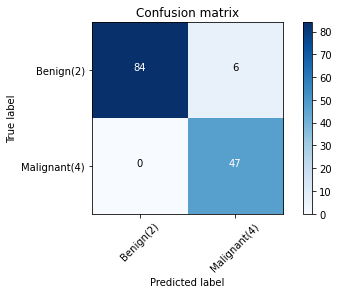

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           2       1.00      0.93      0.97        90
           4       0.89      1.00      0.94        47

    accuracy                           0.96       137
   macro avg       0.94      0.97      0.95       137
weighted avg       0.96      0.96      0.96       137

Confusion matrix, without normalization
[[84  6]
 [ 0 47]]


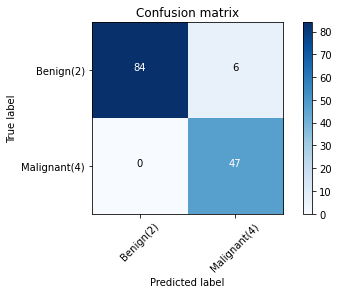

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat1, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [0]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9567631512710799

In [0]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat1, average='weighted') 

0.9567631512710799

In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9562043795620438

In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat1)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9562043795620438

In [0]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

NameError: ignored

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[6.11e-01, 3.89e-01],
       [6.90e-01, 3.10e-01],
       [6.71e-01, 3.29e-01],
       [6.67e-01, 3.33e-01],
       [6.72e-01, 3.28e-01],
       [6.74e-01, 3.26e-01],
       [6.72e-01, 3.28e-01],
       [5.72e-01, 4.28e-01],
       [5.78e-01, 4.22e-01],
       [6.54e-01, 3.46e-01],
       [6.87e-01, 3.13e-01],
       [6.60e-01, 3.40e-01],
       [6.75e-01, 3.25e-01],
       [6.78e-01, 3.22e-01],
       [6.71e-01, 3.29e-01],
       [6.83e-01, 3.17e-01],
       [6.82e-01, 3.18e-01],
       [6.21e-01, 3.79e-01],
       [6.60e-01, 3.40e-01],
       [6.90e-01, 3.10e-01],
       [5.21e-01, 4.79e-01],
       [6.69e-01, 3.31e-01],
       [6.60e-01, 3.40e-01],
       [6.61e-01, 3.39e-01],
       [6.75e-01, 3.25e-01],
       [6.83e-01, 3.17e-01],
       [6.69e-01, 3.31e-01],
       [6.73e-01, 3.27e-01],
       [6.73e-01, 3.27e-01],
       [5.89e-01, 4.11e-01],
       [6.74e-01, 3.26e-01],
       [6.61e-01, 3.39e-01],
       [6.59e-01, 3.41e-01],
       [6.93e-01, 3.07e-01],
       [6.62e-

In [0]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6306820487836253

Practice
Can you rebuild the model, but this time with a __linear__ kernel? You can use __kernel='linear'__ option, when you define the svm. How the accuracy changes with the new kernel function?

In [0]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Avg F1-score: 0.5938
Jaccard score: 0.6861


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
